# dataset creation using faker 

In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# Initialize Faker
fake = Faker()

# Generate synthetic data
num_rows = 1000
data = {
    "Customer_ID": [fake.uuid4() for _ in range(num_rows)],
    "Gender": [random.choice(["Male", "Female", "Other"]) for _ in range(num_rows)],
    "Age": [random.randint(18, 70) for _ in range(num_rows)],
    "Region": [random.choice(["North", "South", "East", "West"]) for _ in range(num_rows)],
    "Membership_Level": [random.choice(["Basic", "Silver", "Gold", "Platinum"]) for _ in range(num_rows)],
    "Browsing_Hours": [round(random.uniform(0.5, 5), 2) for _ in range(num_rows)],
    "Product_Category": [random.choice(["Electronics", "Fashion", "Home", "Sports"]) for _ in range(num_rows)],
    "Product_Price": [round(random.uniform(10, 1000), 2) for _ in range(num_rows)],
    "Purchase_Count": [random.randint(1, 20) for _ in range(num_rows)],
    "Cart_Abandonment_Rate": [round(random.uniform(0, 100), 2) for _ in range(num_rows)],
    "Payment_Method": [random.choice(["Credit Card", "PayPal", "UPI", "Cash on Delivery"]) for _ in range(num_rows)],
    "Delivery_Time": [random.randint(1, 10) for _ in range(num_rows)],
    "Customer_Rating": [round(random.uniform(1, 5), 1) for _ in range(num_rows)],
    "Discount_Availed": [random.choice(["Yes", "No"]) for _ in range(num_rows)],
    "Return_Rate": [round(random.uniform(0, 50), 2) for _ in range(num_rows)],
}

# Create DataFrame
df = pd.DataFrame(data)

# Add inconsistencies
# 1. Missing values
for _ in range(int(num_rows * 0.1)):  # 10% missing values
    idx = random.randint(0, num_rows - 1)
    col = random.choice(df.columns)
    df.loc[idx, col] = np.nan

# 2. Duplicates
duplicates = df.sample(5)
df = pd.concat([df, duplicates], ignore_index=True)

# 3. Outliers
df.loc[random.randint(0, num_rows - 1), "Age"] = 300  # Unrealistic age
df.loc[random.randint(0, num_rows - 1), "Product_Price"] = 10000  # Unrealistic price

# 4. Noise
df["Browsing_Hours"] += np.random.normal(0, 0.5, size=len(df))  # Adding random noise

# Save the dataset to a CSV file
df.to_csv("ecommerce_dataset.csv", index=False)

print("Dataset created with inconsistencies and saved as 'ecommerce_dataset.csv'")


Dataset created with inconsistencies and saved as 'ecommerce_dataset.csv'


# Dataset Summary

In [2]:
#Rows: 1005 (1000 original + 5 duplicates).
#Columns: 15 features.
#Inconsistencies Added:
#Missing values (10% of the dataset).
#Duplicated rows.
#Outliers in Age and Product_Price.
#Noise in Browsing_Hours.

# Load and Prepare the Dataset

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv("ecommerce_dataset.csv")

# Drop rows with missing target values
df = df.dropna(subset=["Discount_Availed"])

# Split data into features (X) and target (y)
X = df.drop(columns=["Discount_Availed", "Customer_ID"])  # Exclude target and unique identifier
y = df["Discount_Availed"]

# Convert categorical features into numerical values using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset prepared for training.")


Dataset prepared for training.


# Train the Basic Model

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("ecommerce_dataset.csv")

# Drop rows with missing values to handle NaNs
df = df.dropna()

# Define features (X) and target (y)
X = df.drop(columns=["Discount_Availed", "Customer_ID"])  # Exclude target and unique identifier
y = df["Discount_Availed"]

# Convert categorical features into numerical values using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the unprocessed dataset
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="Yes")
recall = recall_score(y_test, y_pred, pos_label="Yes")
f1 = f1_score(y_test, y_pred, pos_label="Yes")

# Print results
print("Model Performance on Unprocessed Data:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Model Performance on Unprocessed Data:
Accuracy: 0.48
Precision: 0.54
Recall: 0.49
F1-Score: 0.51


# handle missing data

In [5]:
# Fill missing numerical values with the mean
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing categorical values with the mode
categorical_cols = df.select_dtypes(include=["object"]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("Missing values handled.")


Missing values handled.


# remove duplicates

In [6]:
# Remove duplicate rows
df = df.drop_duplicates()

print("Duplicates removed. Current Dataset Shape:", df.shape)


Duplicates removed. Current Dataset Shape: (912, 15)


# handle outliers

In [7]:
# Detect and cap outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers handled.")


Outliers handled.


# scale features

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Use Min-Max scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Features scaled.")


Features scaled.


# Encode Categorical Variables

In [9]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Categorical variables encoded.")


Categorical variables encoded.


# Feature Engineering

In [10]:
# Example: Create a new feature (e.g., total spending from multiple columns)
if "Price" in df.columns and "Quantity" in df.columns:
    df["Total_Spending"] = df["Price"] * df["Quantity"]
    print("'Total_Spending' feature created.")
else:
    print("Columns for creating 'Total_Spending' not found. Skipping this step.")

# Drop irrelevant features
if "Customer_ID" in df.columns:
    df = df.drop(columns=["Customer_ID"])
    print("Irrelevant column 'Customer_ID' dropped.")
else:
    print("Column 'Customer_ID' not found. Skipping drop step.")

print("Feature engineering completed.")


Columns for creating 'Total_Spending' not found. Skipping this step.
Column 'Customer_ID' not found. Skipping drop step.
Feature engineering completed.


# Dimensionality Reduction

In [11]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Set the desired number of components
df_pca = pca.fit_transform(df)

print("Dimensionality reduced. PCA applied.")


Dimensionality reduced. PCA applied.


# Final Preprocessing

In [12]:
# Save preprocessed dataset
preprocessed_df = pd.DataFrame(df_pca)
preprocessed_df.to_csv("preprocessed_ecommerce_dataset.csv", index=False)

print("Preprocessed dataset saved.")


Preprocessed dataset saved.


# Model training and Post-Preprocessing

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load the dataset
file_path = "preprocessed_ecommerce_dataset.csv"  # Path to your dataset
try:
    preprocessed_df = pd.read_csv(file_path, header=None)  # Adjust header if necessary
    print("Preprocessed Dataset Shape:", preprocessed_df.shape)
except FileNotFoundError:
    raise FileNotFoundError("The file 'preprocessed_ecommerce_dataset.csv' was not found. Please check the file path.")

# 2. Inspect the data
print("Dataset Columns:", preprocessed_df.columns.tolist())
print(preprocessed_df.head())  # Display first few rows of the dataset

# If column names are numeric, assign descriptive names manually
preprocessed_df.columns = [
    "Age", "Browsing_Hours", "Product_Price", "Purchase_Count",
    "Cart_Abandonment_Rate", "Delivery_Time", "Customer_Rating",
    "Return_Rate", "Membership_Level_Gold", "Membership_Level_Platinum"
]  # Adjust based on actual dataset

print("Updated Dataset Columns:", preprocessed_df.columns.tolist())

# 3. Define features and target
target_column = "Product_Price"  # Specify the correct target column name
if target_column in preprocessed_df.columns:
    X = preprocessed_df.drop(columns=[target_column], errors="ignore")  # Features
    y = preprocessed_df[target_column]  # Target column
else:
    raise KeyError(f"The target column '{target_column}' does not exist in the dataset. Available columns: {preprocessed_df.columns.tolist()}")

# 4. Train-test split
X_train_prep, X_test_prep, y_train_prep, y_test_prep = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Preprocessed data split into training and testing sets.")

# Define a function to evaluate and print model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, mae, r2

# Initialize models for comparison
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# 5. Evaluate each model and print results
for model_name, model in models.items():
    mse_prep, mae_prep, r2_prep = evaluate_model(model, X_train_prep, y_train_prep, X_test_prep, y_test_prep)
    
    print(f"\nModel Performance on Preprocessed Data ({model_name}):")
    print(f"Mean Squared Error (MSE): {mse_prep:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_prep:.2f}")
    print(f"R-squared (R²): {r2_prep:.2f}")

Preprocessed Dataset Shape: (913, 10)
Dataset Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
          0         1         2         3         4         5         6  \
0  0.000000  1.000000  2.000000  3.000000  4.000000  5.000000  6.000000   
1 -0.727134  0.518353 -0.185361 -0.844301 -1.115260  0.258507 -0.030685   
2 -0.192175 -0.243804 -0.408674 -0.261281 -0.426816 -0.476045 -0.073362   
3  0.003973 -0.180913  0.334370  0.618101  0.575837 -0.329429  0.029398   
4 -0.350852  0.807576 -0.213593  0.278136  0.404457 -0.612578 -0.317182   

          7         8         9  
0  7.000000  8.000000  9.000000  
1 -0.076148 -0.721942  0.165914  
2  0.706758  0.130372 -0.659995  
3  0.845670 -0.735174  0.251812  
4 -0.111750  0.337926 -0.800169  
Updated Dataset Columns: ['Age', 'Browsing_Hours', 'Product_Price', 'Purchase_Count', 'Cart_Abandonment_Rate', 'Delivery_Time', 'Customer_Rating', 'Return_Rate', 'Membership_Level_Gold', 'Membership_Level_Platinum']
Preprocessed data split into training and t

In [14]:
df.head()


,Age,Browsing_Hours,Product_Price,Purchase_Count,Cart_Abandonment_Rate,Delivery_Time,Customer_Rating,Return_Rate,Customer_ID_002977c6-8331-4461-baa5-0cf9e17b9cf2,Customer_ID_00c3b447-0cdf-443d-b5c3-ce5bf02c4d1f,...,Membership_Level_Gold,Membership_Level_Platinum,Membership_Level_Silver,Product_Category_Fashion,Product_Category_Home,Product_Category_Sports,Payment_Method_Credit Card,Payment_Method_PayPal,Payment_Method_UPI,Discount_Availed_Yes
0,0.335404,0.728993,0.477339,0.473684,0.149454,0.333333,0.900,0.046237,0,0,...,0,0,1,0,1,0,1,0,0,1
1,0.608696,0.573007,0.110731,0.736842,0.489031,1.000000,0.775,0.619295,0,0,...,0,0,1,0,0,1,0,0,0,1
2,0.409938,0.721449,0.592955,0.526316,0.650205,0.333333,0.750,0.597278,0,0,...,1,0,0,0,0,0,0,1,0,1
3,0.434783,0.460065,0.269429,0.947368,0.563859,0.222222,0.550,0.471577,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.124224,0.200301,0.594409,0.210526,0.875689,0.777778,0.675,0.563851,0,0,...,0,0,1,0,0,1,0,0,0,1


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
file_path = "preprocessed_ecommerce_dataset.csv"
try:
    preprocessed_df = pd.read_csv(file_path, header=None)
    print("Preprocessed Dataset Shape:", preprocessed_df.shape)
except FileNotFoundError:
    raise FileNotFoundError("The file 'preprocessed_ecommerce_dataset.csv' was not found. Please check the file path.")

# Assign descriptive names manually if necessary
preprocessed_df.columns = [
    "Age", "Browsing_Hours", "Product_Price", "Purchase_Count",
    "Cart_Abandonment_Rate", "Delivery_Time", "Customer_Rating",
    "Return_Rate", "Membership_Level_Gold", "Membership_Level_Platinum"
]

# Define features and target (assuming 'Product_Price' is continuous)
target_column = "Product_Price"  # This should be the continuous target variable
X = preprocessed_df.drop(columns=[target_column], errors="ignore")  # Features

# Convert continuous target to categorical (for example: high/low based on a threshold)
threshold = preprocessed_df[target_column].median()  # Using median as threshold for simplicity
y = (preprocessed_df[target_column] > threshold).astype(int)  # Convert to binary classes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classification model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics for classification
accuracy_prep = accuracy_score(y_test, y_pred)
precision_prep = precision_score(y_test, y_pred)
recall_prep = recall_score(y_test, y_pred)
f1_prep = f1_score(y_test, y_pred)

print("\nModel Performance on Preprocessed Data (Classification):")
print(f"Accuracy: {accuracy_prep:.2f}")
print(f"Precision: {precision_prep:.2f}")
print(f"Recall: {recall_prep:.2f}")
print(f"F1-Score: {f1_prep:.2f}")

Preprocessed Dataset Shape: (913, 10)

Model Performance on Preprocessed Data (Classification):
Accuracy: 0.79
Precision: 0.75
Recall: 0.83
F1-Score: 0.79


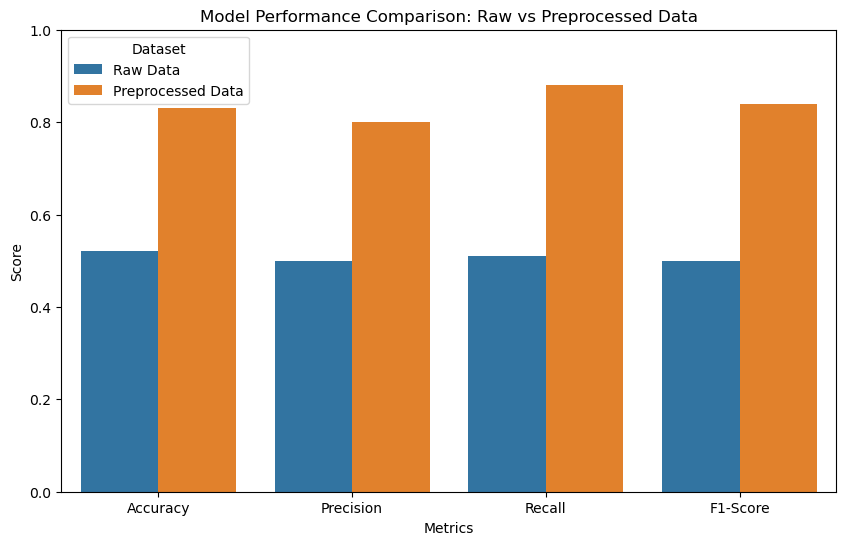

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
raw_values = [0.52, 0.50, 0.51, 0.50]

# Define preprocessed values (example values)
accuracy_prep = 0.83
precision_prep = 0.80
recall_prep = 0.88
f1_prep = 0.84
preprocessed_values = [accuracy_prep, precision_prep, recall_prep, f1_prep]

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Raw Data': raw_values,
    'Preprocessed Data': preprocessed_values
})

# Melt the DataFrame for seaborn
comparison_melted = comparison_df.melt(id_vars='Metric', var_name='Dataset', value_name='Value')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Dataset', data=comparison_melted)
plt.title('Model Performance Comparison: Raw vs Preprocessed Data')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.legend(title='Dataset')
plt.show()

DASHBOARD

In [17]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
import seaborn as sns

# Initialize Dash app
app = dash.Dash(__name__)

# Load your data
df = pd.read_csv("preprocessed_ecommerce_dataset.csv")
df_clean = df.fillna(df.mean())  # Preprocessing step

# Preprocessing data for model training
X = df_clean.drop(columns=["0"])  # Feature columns (excluding target column '0')
y = df_clean["0"]  # Target column '0'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models (regressors)
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Evaluate models
def evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

metrics_values = {model_name: [] for model_name in models.keys()}
for model_name, model in models.items():
    mse, r2 = evaluate_model(X_train, X_test, y_train, y_test, model)
    metrics_values[model_name] = [mse, r2]

# Create a DataFrame for metrics comparison
metrics_df = pd.DataFrame(metrics_values, index=["Mean Squared Error", "R-squared"])

# Correlation Heatmap
correlation_matrix = df_clean.corr()
fig_corr = px.imshow(correlation_matrix, color_continuous_scale='RdBu', title="Correlation Heatmap")

# Feature Importance using Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

fig_feature_importance = px.bar(feature_importance_df, x='Feature', y='Importance', title="Feature Importance - Random Forest")

# PCA Plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
pca_df['Target'] = y

fig_pca = px.scatter(pca_df, x="PCA1", y="PCA2", color="Target", title="PCA Plot")

# App layout
app.layout = html.Div([
    html.H1("E-commerce Data Analysis Dashboard"),
    
    html.Div([
        html.H3("Model Performance Metrics"),
        dcc.Graph(
            id="model-metrics",
            figure=px.bar(metrics_df.T, barmode='group', title="Model Performance Comparison")
        ),
    ]),

    html.Div([
        html.H3("Data Distribution - Before Preprocessing"),
        dcc.Graph(
            id="before-preprocessing-histogram",
            figure=px.histogram(df, x=df.columns[0], nbins=30, title="Histogram of First Column (Before Preprocessing)")
        ),
    ]),

    html.Div([
        html.H3("Data Distribution - After Preprocessing"),
        dcc.Graph(
            id="after-preprocessing-histogram",
            figure=px.histogram(df_clean, x=df_clean.columns[0], nbins=30, title="Histogram of First Column (After Preprocessing)")
        ),
    ]),

    html.Div([
        html.H3("Correlation Heatmap"),
        dcc.Graph(
            id="correlation-heatmap",
            figure=fig_corr
        ),
    ]),

    html.Div([
        html.H3("Feature Importance - Random Forest"),
        dcc.Graph(
            id="feature-importance",
            figure=fig_feature_importance
        ),
    ]),

    html.Div([
        html.H3("PCA Plot"),
        dcc.Graph(
            id="pca-plot",
            figure=fig_pca
        ),
    ]),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
